[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/infinite-Joy/natural_language_processing_for_professionals/blob/master/notebooks/chapter_7_attention_and_transformers.ipynb)

In [ ]:
%%capture
%pip install transformers
%pip install bertviz

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", output_attentions=True)

raw_text = "Hello, my dog is cute"

inputs = tokenizer(raw_text, return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
outputs = model(**inputs, labels=labels)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
outputs[2][0].shape

torch.Size([1, 12, 8, 8])

In [ ]:
outputs.to_tuple()[2][0].shape

torch.Size([1, 12, 8, 8])

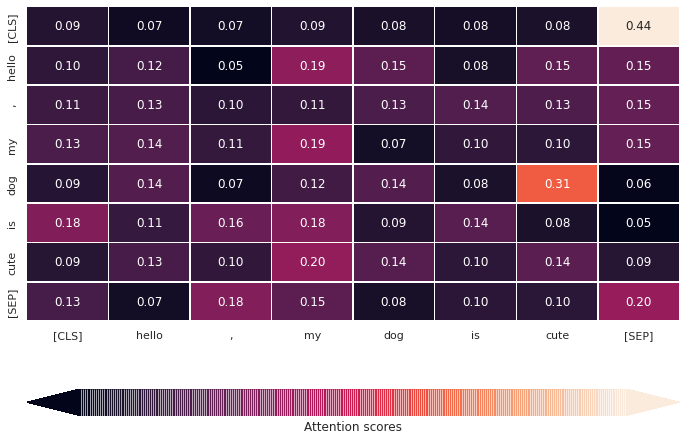

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

enc = tokenizer.encode_plus(
  raw_text,
  add_special_tokens=True,
  return_token_type_ids=False,
  return_attention_mask=False,
  truncation=True
)['input_ids']

text = tokenizer.convert_ids_to_tokens(enc)

output_attention_index = 2
attention_head = 0
layer = 0
batch = 0
attention = outputs.to_tuple()[output_attention_index][layer][batch][attention_head].detach().numpy()
cbar_kws = {"label":"Attention scores", "orientation":"horizontal", 'shrink':1, 'extend':'both', 'extendfrac':0.1, 'ticks':np.arange(0,3), 'drawedges':True }
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(attention, linewidth=0.5, annot=True, xticklabels=text, yticklabels=text, fmt="0.2f", cbar_kws=cbar_kws)
plt.show()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

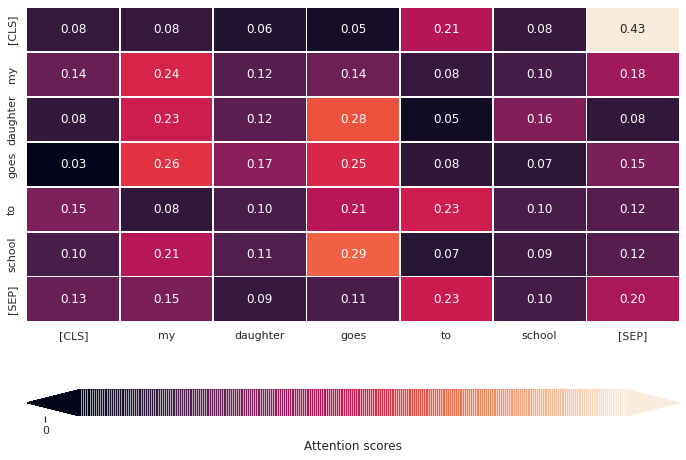

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", output_attentions=True)

raw_text = "My daughter goes to school"

inputs = tokenizer(raw_text, return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)  # Batch size 1
outputs = model(**inputs, labels=labels)

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

enc = tokenizer.encode_plus(
  raw_text,
  add_special_tokens=True,
  return_token_type_ids=False,
  return_attention_mask=False,
  truncation=True
)['input_ids']

text = tokenizer.convert_ids_to_tokens(enc)

output_attention_index = 2
attention_head = 0
layer = 0
batch = 0
attention = outputs.to_tuple()[output_attention_index][layer][batch][attention_head].detach().numpy()
cbar_kws = {"label":"Attention scores", "orientation":"horizontal", 'shrink':1, 'extend':'both', 'extendfrac':0.1, 'ticks':np.arange(0,3), 'drawedges':True }
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(attention, linewidth=0.5, annot=True, xticklabels=text, yticklabels=text, fmt="0.2f", cbar_kws=cbar_kws)
plt.show()

## Positional Encodings

In [ ]:
import numpy as np

def positional_encoding(max_position, d_model, min_freq=1e-4):
    position = np.arange(max_position)
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    return pos_enc

pos_enc = positional_encoding(10, 5)
print(pos_enc.shape)
print(pos_enc)

(10, 5)
[[ 1.          0.          1.          0.          1.        ]
 [ 0.54030231  0.84147098  0.99968454  0.02511622  0.9999998 ]
 [-0.41614684  0.90929743  0.99873835  0.0502166   0.9999992 ]
 [-0.9899925   0.14112001  0.99716204  0.07528529  0.99999821]
 [-0.65364362 -0.7568025   0.99495659  0.10030649  0.99999682]
 [ 0.28366219 -0.95892427  0.9921234   0.1252644   0.99999502]
 [ 0.96017029 -0.2794155   0.98866425  0.15014327  0.99999283]
 [ 0.75390225  0.6569866   0.98458133  0.17492742  0.99999025]
 [-0.14550003  0.98935825  0.97987722  0.1996012   0.99998726]
 [-0.91113026  0.41211849  0.97455487  0.22414905  0.99998388]]


## Attention

### Self attention calculations

In [ ]:
import numpy as np
from scipy.special import softmax
import math
from random import choice

# x = np.array([choice([0, 1.,2.]) for _ in range(12)])
x = np.array([1., 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1])
x = x.reshape(3,4)

query_w = np.array([1., 0, 1., 1, 0, 0, 0, 0, 1, 0, 1, 1])
query_w = query_w.reshape(4, 3)


key_w = np.array([0, 0, 1., 1, 1, 0, 0, 1, 0, 1, 1, 0])
key_w = key_w.reshape(4, 3)

value_w = np.array([0, 2, 0, 0, 3, 0, 1, 0, 3, 1, 1, 0])
value_w = value_w.reshape(4, 3)

Q = x @ query_w
K = x @ key_w
V = x @ value_w

k_d = int(math.sqrt(3))
print('k_d:', k_d)

attention_score = (Q @ K.transpose())/k_d
print(attention_score)

attention_score = softmax(attention_score, axis=1) # taking softmax across the rows
print("attention_score: ")
print(attention_score)

k_d: 1
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]
attention_score: 
[[6.33789383e-02 4.68310531e-01 4.68310531e-01]
 [6.03366485e-06 9.82007865e-01 1.79861014e-02]
 [2.95387223e-04 8.80536902e-01 1.19167711e-01]]


### Multi Head attention

In [ ]:
import numpy as np

print("Assuming the training on the 8 heads of the attention sub-layer is done.")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head", z0h1.shape, "dimension of 8 heads", 64*8)

print("Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model")
output_attention=np.hstack((z0h1, z1h2, z2h3, z3h4, z4h5, z5h6, z6h7, z7h8))
print('final output shape', output_attention.shape)

Assuming the training on the 8 heads of the attention sub-layer is done.
shape of one head (3, 64) dimension of 8 heads 512
Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model
final output shape (3, 512)


### Masked Multi Head attention

In [ ]:
import numpy as np
import numpy.ma as ma
import math

print('original attention scores (after scaling)')
print(attention_score)

zeros = np.zeros(attention_score.shape)
mx = ma.masked_array(zeros, mask=[0, 1, 1, 0, 0, 1, 0, 0, 0], fill_value=1e+20)

print('masked values')
print(mx)

print('fill the mask')
mx = mx.filled(fill_value=float('-inf'))

print('add the masking')
attention_score1 = attention_score + mx
print(attention_score1)

attention_score1 = softmax(attention_score1, axis=1) # taking softmax across the rows
print(attention_score1)

original attention scores (after scaling)
[[6.33789383e-02 4.68310531e-01 4.68310531e-01]
 [6.03366485e-06 9.82007865e-01 1.79861014e-02]
 [2.95387223e-04 8.80536902e-01 1.19167711e-01]]
masked values
[[0.0 -- --]
 [0.0 0.0 --]
 [0.0 0.0 0.0]]
fill the mask
add the masking
[[6.33789383e-02           -inf           -inf]
 [6.03366485e-06 9.82007865e-01           -inf]
 [2.95387223e-04 8.80536902e-01 1.19167711e-01]]
[[1.         0.         0.        ]
 [0.27249476 0.72750524 0.        ]
 [0.22037557 0.53143172 0.24819272]]


## Pretrained transformer models

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

def t5_prediction(prompt, text):
    text = prompt + text
    input_ids = tokenizer(text, return_tensors="pt").input_ids
    outputs = model.generate(input_ids)
    print(prompt, tokenizer.decode(outputs[0], skip_special_tokens=True))

t5_prediction('translate English to German: ', 'The truth will set you free.')
t5_prediction('cola sentence: ', 'This is a good book.')
t5_prediction('stsb ', 'sentence1: I am happy today. sentence2: I am in a good mood today.')
t5_prediction('summarize: ', "Salman Khan is going to make a big splash with his on-screen entry in Chiranjeevi's film 'Godfather'. A source close to the production revealed to ETimes that the makers of the film want to create something special since this film features two superstars and their fans will have high expectations from a project that brings Salman and Chiranjeevi together. ")

translate English to German:  Die Wahrheit wird Sie frei setzen.
cola sentence:  acceptable
stsb  5.0
summarize:  source close to production revealed that makers want to create something special. 'Godfather
